## Classification with Tensorflow:

Previously, in our **Regression** based problem, we were generating artificial data, to feed in to our Neural Network classifier, in order to predict the results. Now in this **Classification** based problem we'll be using __pima-indians-diabetes-dataset__ for our predictive analysis with Tensorflow.

We'll be using __tf.estimator API__, and we'll also be showing how to use __Categorical__ and __Continuous__ features columns. A lot of real life datasets, aren't just gonna have pure __Continuous__ numerical features, instead they may have __Categorical__ features. So, we're gonna show you how to deal with those using the __tf.estimator API__, and then we'll also show you how you can use the __tf.estimator API__ to switch the models between like a __Linear Classifier__ to a __Dense Neural Network Classifier__.

So, let's go ahead and GET STARTED!!

In [31]:
import pandas as pd

In [35]:
pwd # reports back the current working directory!

'/home/umairshah'

In [36]:
diabetes = pd.read_csv('/home/umairshah/Datasets/Pima/diabetes.csv')

In [37]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
diabetes.rename(columns = {'Outcome':'Class'}, inplace = True)

In [39]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Normalization:

In [40]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

In [41]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [43]:
# Handy way to normalizing the columns!

diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [44]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [45]:
import tensorflow as tf

In [62]:
# Transforming them all into Numeric columns!

num_preg = tf.feature_column.numeric_column('Pregnancies')
plasma_gluc = tf.feature_column.numeric_column('Glucose')
dias_press = tf.feature_column.numeric_column('BloodPressure')
skin_thick = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

In [53]:
# Trasnformating 'Class' and 'Age' to Categorical columns usig 'Hash bucket'

group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])

In [57]:
# Converting Continuous column to a Categorical column!
# Let's first Visualize this


import matplotlib.pyplot as plt
%matplotlib inline

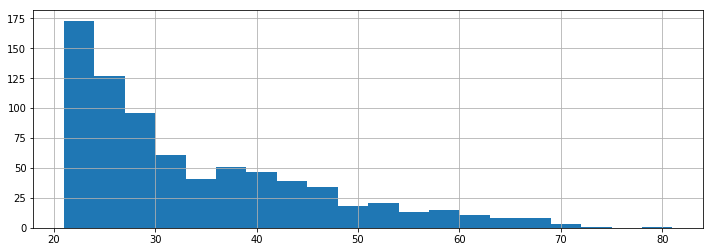

In [76]:
plt.figure(figsize = (12,4))
diabetes['Age'].hist(bins = 20)

In [61]:
# Bucketing a Continuous Value to a Categorical Value

age_bucket = tf.feature_column.bucketized_column(age, boundaries = [20,30,40,50,60,70,80])

 # -> pass in the continuous value as argument, and set the boudaries 20-30, 30-40 and so on.. for different buckets

In [82]:
feat_cols = [num_preg, plasma_gluc, dias_press, skin_thick, insulin, bmi, diabetes_pedigree, age_bucket]

In [83]:
# TRAIN TEST SPLIT:

x_data = diabetes.drop('Class', axis = 1)
labels = diabetes['Class']

In [84]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [85]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

## Train Test Split:

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.3, random_state = 101)

## Input Functions:

In [88]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size = 10,
                                                num_epochs = 1000, shuffle = True)

In [89]:
# Linear Classifier

model = tf.estimator.LinearClassifier(feature_columns = feat_cols, n_classes = 2)

W0823 16:29:38.296988 140468405307200 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp6_vwixop


In [90]:
model.train(input_fn = input_func, steps = 1000)

W0823 16:29:39.068390 140468405307200 deprecation.py:323] From /home/umairshah/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/canned/linear.py:308: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W0823 16:29:40.235168 140468405307200 deprecation.py:323] From /home/umairshah/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/monitored_session.py:875: start_queue_runners (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


In [91]:
# Evaluating the Model

eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test,
                                                     batch_size = 10, num_epochs = 1,
                                                     shuffle = False)

In [93]:
# Results 

results = model.evaluate(eval_input_func)

W0823 16:35:59.985953 140468405307200 deprecation.py:323] From /home/umairshah/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/metrics_impl.py:2027: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
W0823 16:36:00.602383 140468405307200 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0823 16:36:00.638809 140468405307200 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0823 16:36:00.970854 140468405307200 deprecation.py:323] From /home/umairshah/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file A

In [96]:
results

# Around 73% accurate results

{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79460907,
 'auc_precision_recall': 0.64358723,
 'average_loss': 0.53082895,
 'label/mean': 0.35064936,
 'loss': 5.1092286,
 'precision': 0.63013697,
 'prediction/mean': 0.37430257,
 'recall': 0.56790125,
 'global_step': 1000}

In [98]:
# Predictions

pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size = 10,
                                                     num_epochs = 1, shuffle = False)

predictions = model.predict(pred_input_func)

In [99]:
my_pred = list(predictions)

In [103]:
print(my_pred)

[{'logits': array([0.08399415], dtype=float32), 'logistic': array([0.5209862], dtype=float32), 'probabilities': array([0.4790138, 0.5209862], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.5701761], dtype=float32), 'logistic': array([0.6388038], dtype=float32), 'probabilities': array([0.3611962, 0.6388038], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.34220123], dtype=float32), 'logistic': array([0.4152749], dtype=float32), 'probabilities': array([0.58472514, 0.41527486], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.74964607], dtype=float

## Dense Neural Network Classifier:

In [105]:
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10,10,10], feature_columns = feat_cols,
                                      n_classes = 2)

# hidden_units = [10,10,10] -> 10 hidden layers, with 10 Neurons each!
# n_classes = no. of classes to predict

W0823 17:53:29.439922 140468405307200 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp97jb946l


### Training the Model:

In [109]:
dnn_model.train(input_fn = input_func, steps = 1000)

### Evaluating Model:

In [113]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test,
                                                     batch_size = 10, num_epochs = 1,
                                                     shuffle = False)

dnn_model.evaluate(eval_input_func)

# Looks like we got around same 'Accuracy' as we get earlier with 'Linear Classifier'

W0823 18:06:13.223000 140468405307200 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0823 18:06:13.253137 140468405307200 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


{'accuracy': 0.75757575,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83897126,
 'auc_precision_recall': 0.7141355,
 'average_loss': 0.48286295,
 'label/mean': 0.35064936,
 'loss': 4.647556,
 'precision': 0.64044946,
 'prediction/mean': 0.405599,
 'recall': 0.7037037,
 'global_step': 3000}

In [114]:
# Let's see what happens with accuracy, if we go crazy on 'Dense layers' and 'No of Neurons'

dnn_model1 = tf.estimator.DNNClassifier(hidden_units = [20,20,20,20,20], feature_columns = feat_cols,
                                       n_classes = 2)

dnn_model1.train = dnn_model1.train(input_fn = input_func, steps = 1000)

eval_input_func1 = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test,
                                                     batch_size = 10, num_epochs = 1,
                                                     shuffle = False)

dnn_model1.evaluate(eval_input_func1)

W0823 18:16:44.645871 140468405307200 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp_2x6zj7u
W0823 18:16:50.087977 140468405307200 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0823 18:16:50.121584 140468405307200 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


{'accuracy': 0.7056277,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8221399,
 'auc_precision_recall': 0.7095708,
 'average_loss': 0.6023138,
 'label/mean': 0.35064936,
 'loss': 5.7972703,
 'precision': 0.553719,
 'prediction/mean': 0.5163829,
 'recall': 0.8271605,
 'global_step': 1000}

In [115]:
# Reports back almost same results, hopefully our classifier has reach it's maximum limits for Accuracy!